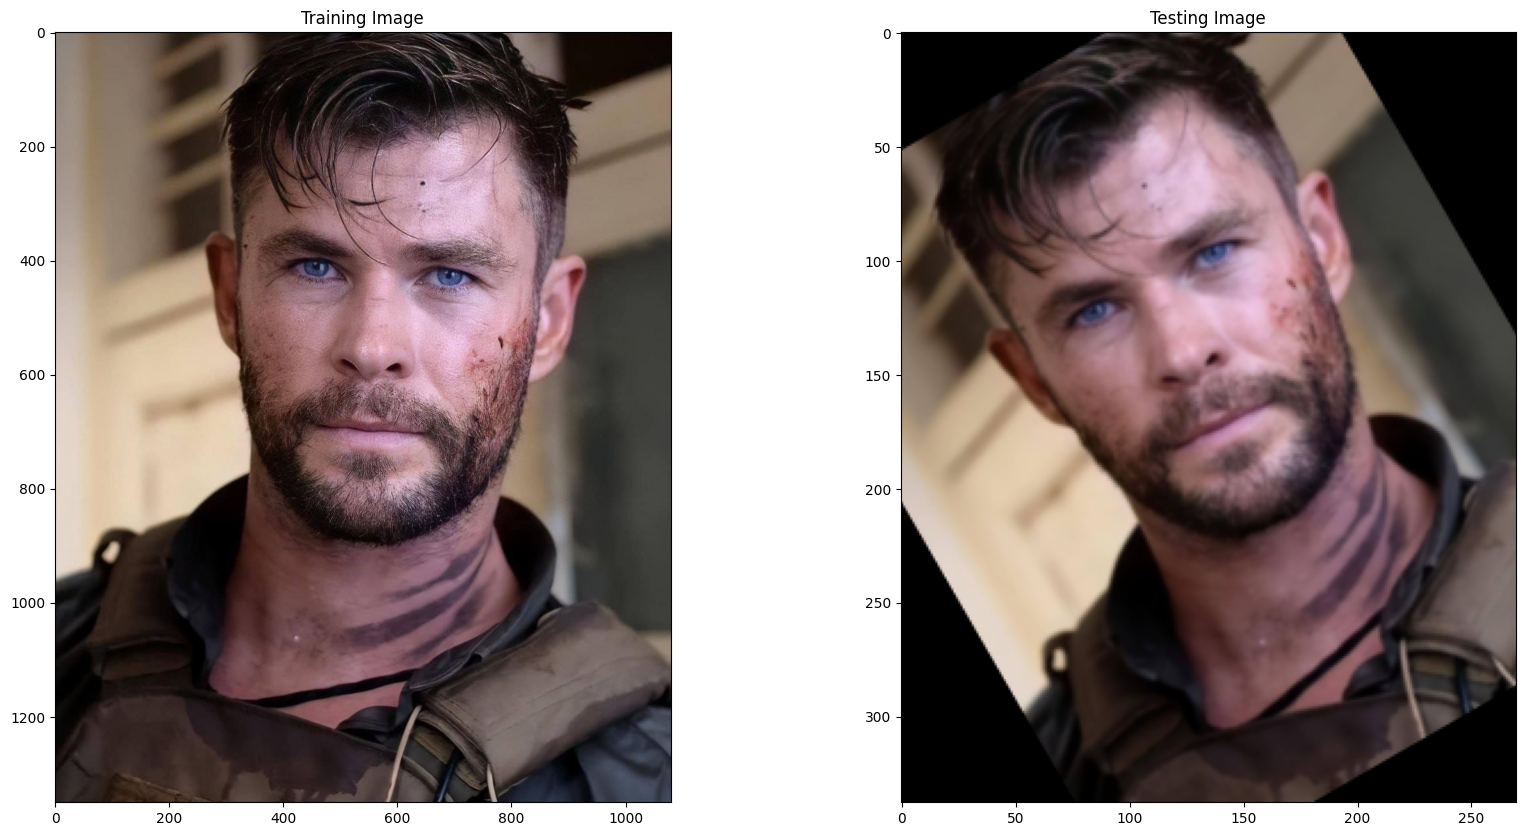

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image1 = cv2.imread('./images/faceimage.jpg')

training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

KeyPoints Detection and Creation of SIFT Descriptor:

Number of Keypoints Detected In The Training Image:  2300
Number of Keypoints Detected In The Query Image:  286


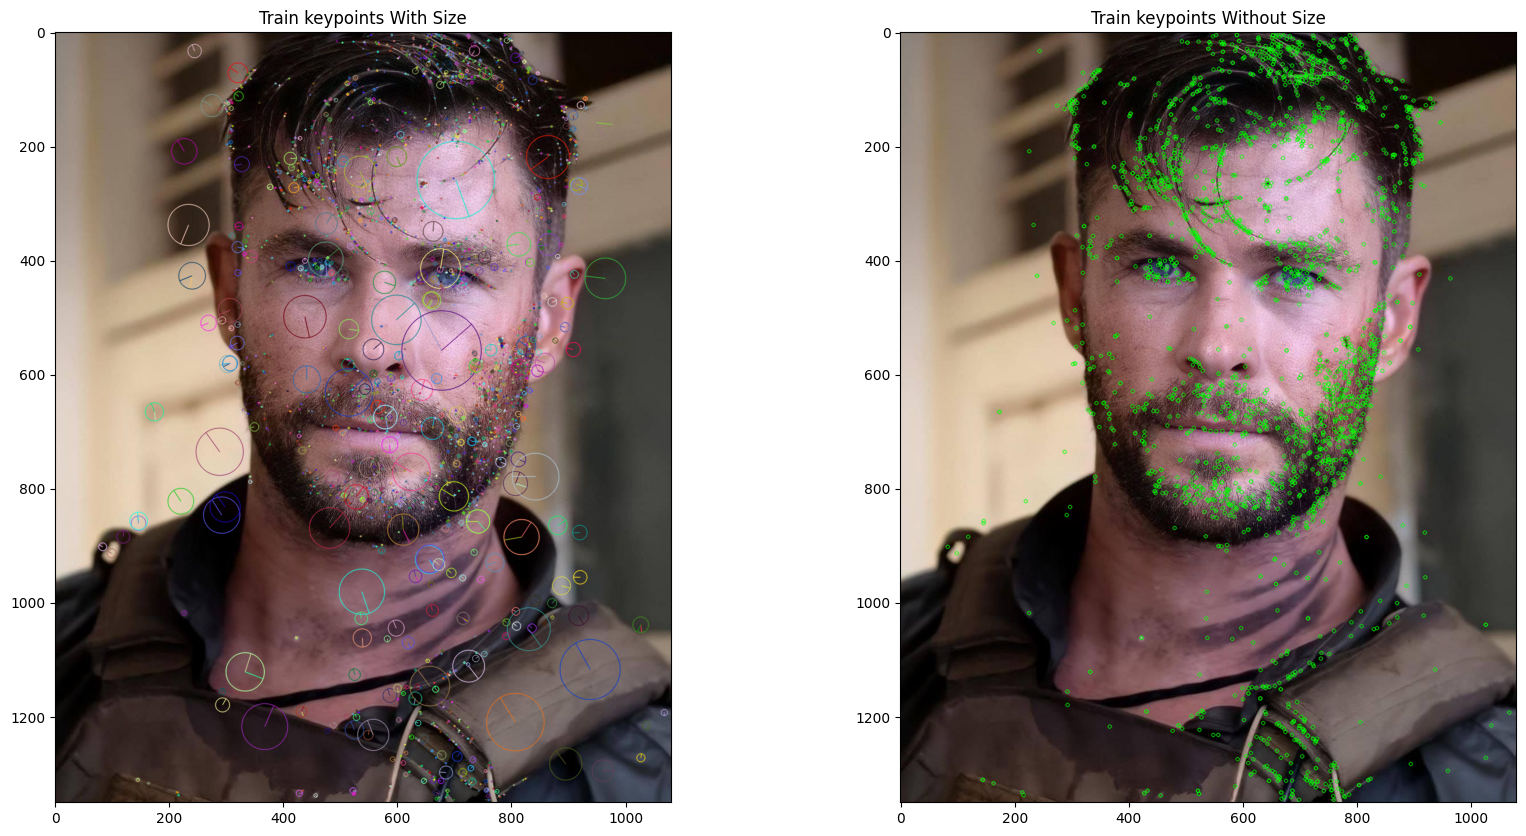

In [3]:
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Matching Keypoints using BruteForceMatcher:

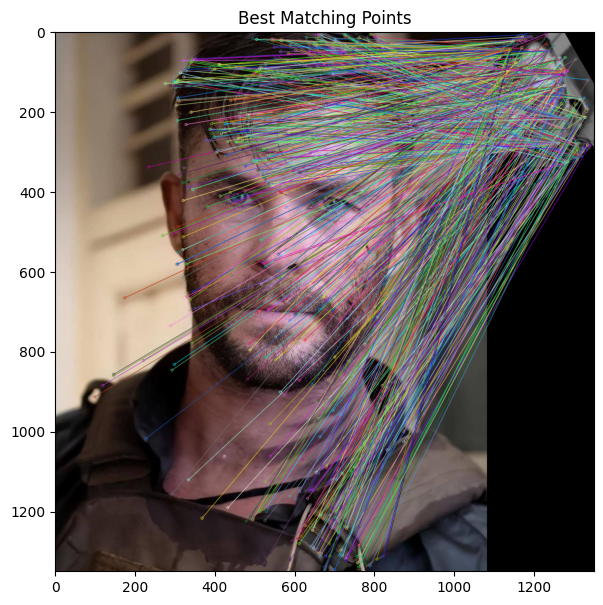


Number of Matching Keypoints Between The Training and Query Images:  2300


In [8]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)
top_matches = matches[:len(matches)//3]

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, top_matches, test_gray, flags = 2)


plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))